In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
def rmse(predictions, targets):
    predictions = np.asarray(predictions)
    predictions = predictions-predictions.mean()
    targets = np.asarray(targets)
    targets = targets-targets.mean()
    return np.sqrt(((predictions - targets) ** 2).mean())

In [3]:
a = sorted([filename for filename in glob.glob("./018/surface*")])
b = sorted([filename for filename in glob.glob("./021/surface*")])
c = sorted([filename for filename in glob.glob("./019/surface*")])
d = sorted([filename for filename in glob.glob("./056/surface*")])
e = sorted([filename for filename in glob.glob("./023/surface*")])
f = sorted([filename for filename in glob.glob("./022/surface*")])
g = sorted([filename for filename in glob.glob("./057/surface*")])

a = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in a]
b = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in b]
c = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in c]
d = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in d]
e = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in e]
f = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in f]
g = [pd.read_table(filename,delim_whitespace=True,header=None,skiprows=0) for filename in g]

a = [list(a[i][2]) for i in range(len(a))]
b = [list(b[i][2]) for i in range(len(b))]
c = [list(c[i][2]) for i in range(len(c))]
d = [list(d[i][2]) for i in range(len(d))]
e = [list(e[i][2]) for i in range(len(e))]
f = [list(f[i][2]) for i in range(len(f))]
g = [list(g[i][2]) for i in range(len(g))]

topo_dict = {"ref":a, "rad":b, "hor":c, "s20":d, "rad_assim":e, "hor_assim":f,
            "s20_assim":g}

rms_dict = dict()
corr_dict = dict()
diff_dict = dict()

In [4]:
ref_topo = topo_dict["ref"]
for k, v in topo_dict.items():
    rms_list = list()
    corr_list = list()
    diff_list = list()
    for i in range(len(v)):
        rms_list.append(rmse(v[i], ref_topo[i]))
        corr_list.append(np.corrcoef(v[i], ref_topo[i])[0,1])
        
        if (i == len(v) - 1):
            diff_list.append(abs(np.asarray(v[i]) - np.asarray(ref_topo[i])))
            
    rms_dict[k] = rms_list
    corr_dict[k] = corr_list
    diff_dict[k] = diff_list

In [5]:
del rms_dict["ref"]
del corr_dict["ref"]
del diff_dict["ref"]

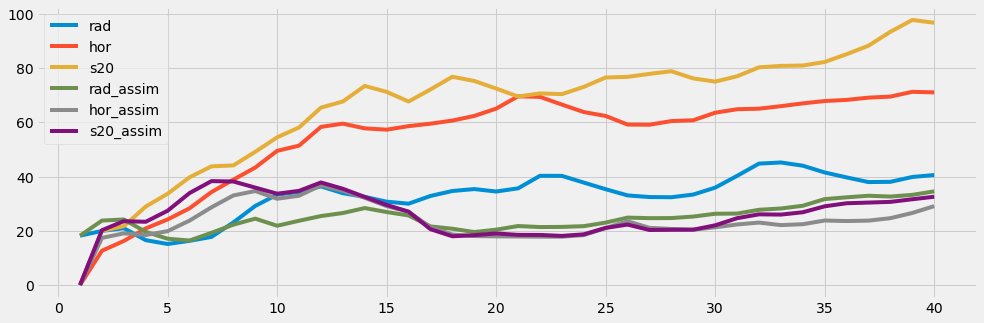

In [6]:
time = np.linspace(1, len(ref_topo), len(ref_topo))
plt.figure(figsize=(15,5))
for name, rms_vals in rms_dict.items():
    plt.plot(time, rms_vals, label=name)
plt.legend()
plt.savefig("RMS_grid.png")
plt.show()

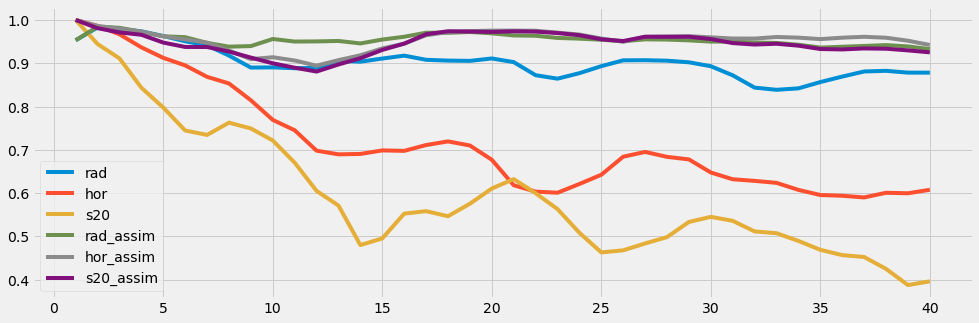

In [7]:
plt.figure(figsize=(15,5))
for name, corr_vals in corr_dict.items():
    plt.plot(time, corr_vals, label=name)
plt.legend()
plt.savefig("Corr_grid.png")
plt.show()

In [9]:
max_diff

[127.9435764, 198.2329308, 356.8063982, 86.2481095, 105.0501912, 118.0879614]

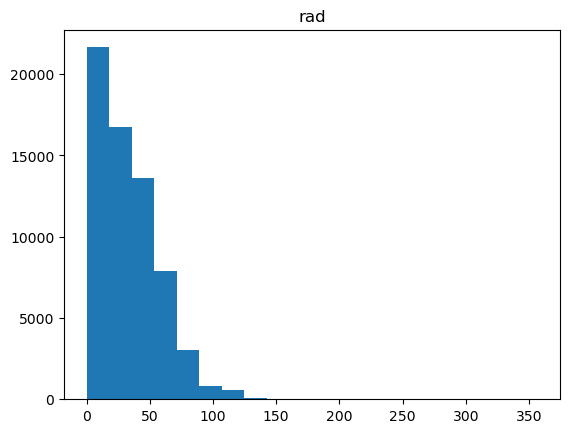

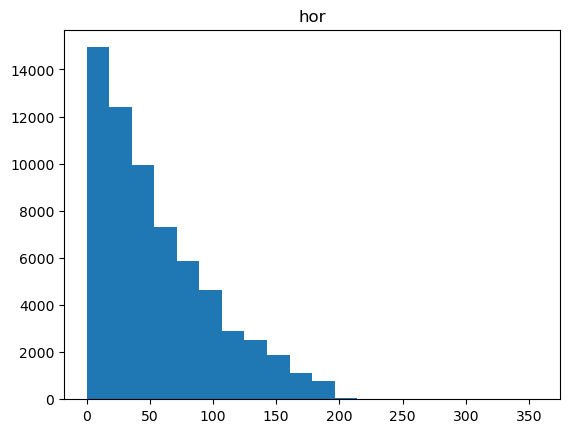

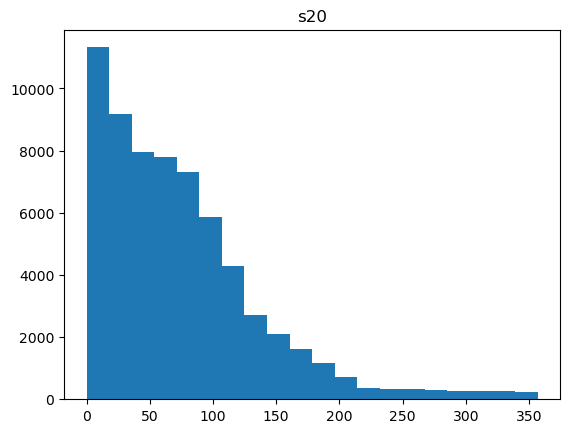

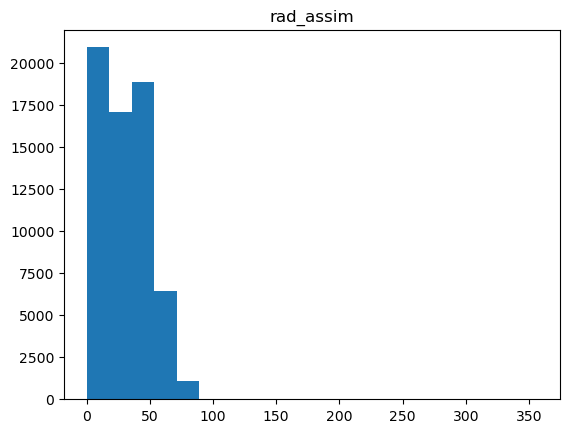

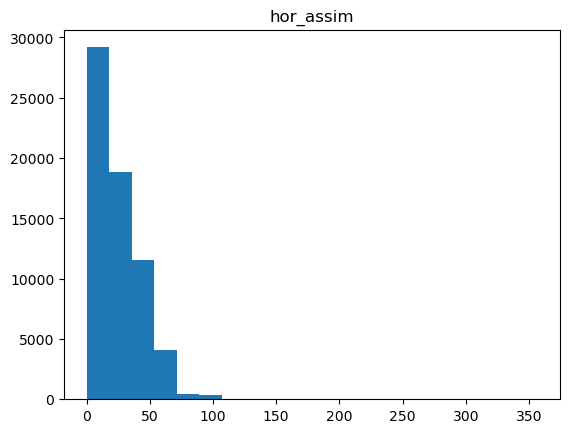

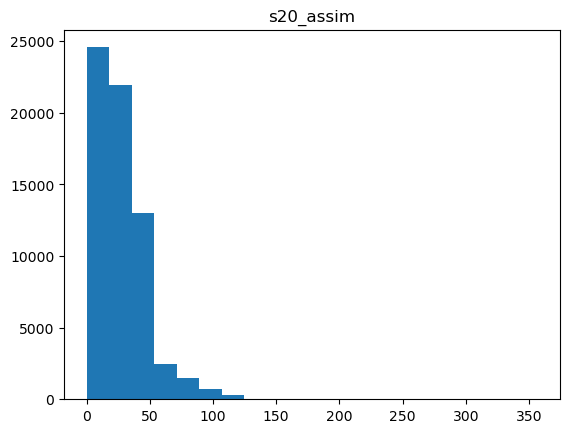

In [21]:
plt.style.use("default")
#plt.figure(figsize=(15,5))
max_diff = max([diff_vals[0].max() for diff_vals in diff_dict.values()])


# add a 'best fit' line

for name, diff_vals in diff_dict.items():
    #(mu, sigma) = norm.fit(diff_vals[-1])
    plt.hist(diff_vals[-1], bins=20, range=(0, max_diff))
    plt.title(name)
    plt.show()

In [33]:
def performance_diagram(figsize=(9, 8), xlabel="Success Ratio (1-FAR)",
                        ylabel="Probability of Detection", ticks=np.arange(0, 1.1, 0.1), 
                        dpi=300, csi_cmap="Blues", csi_label="Critical Success Index", 
                        title="Performance Diagram",
                        legend_params=dict(loc=4, fontsize=12, framealpha=1, frameon=True)):
    """
    Draws a performance diagram from a set of DistributedROC objects.
    :param roc_objs: list or array of DistributedROC Objects.
    :param obj_labels: list or array of labels describing each DistributedROC object.
    :param colors: list of color strings
    :param markers: list of markers.
    :param filename: output filename.
    :param figsize: tuple with size of the figure in inches.
    :param xlabel: Label for the x-axis
    :param ylabel: Label for the y-axis
    :param ticks: Array of ticks used for x and y axes
    :param dpi: DPI of the output image
    :param csi_cmap: Colormap used for the CSI contours
    :param csi_label: Label for the CSI colorbar
    :return:
    """
    plt.figure(figsize=figsize)
    grid_ticks = np.arange(0, 1.01, 0.01)
    sr_g, pod_g = np.meshgrid(grid_ticks, grid_ticks)
    bias = pod_g / sr_g
    csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)
    csi_contour = plt.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap=csi_cmap)
    b_contour = plt.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed")
    plt.clabel(b_contour, fmt="%1.1f", manual=[(0.2, 0.9), (0.4, 0.9), (0.6, 0.9), (0.7, 0.7)])
   
    FAR = 0.1
    POD = 0.9
    filename = "performance_diagram.png"
    plt.plot(1 - FAR, POD)
    cbar = plt.colorbar(csi_contour)
    cbar.set_label(csi_label, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.text(0.48,0.6,"Frequency Bias",fontdict=dict(fontsize=14, rotation=45))
    plt.legend(**legend_params)
    plt.savefig(filename, dpi=dpi, bbox_inches="tight")
    plt.show()

In [34]:
performance_diagram

<function __main__.performance_diagram(figsize=(9, 8), xlabel='Success Ratio (1-FAR)', ylabel='Probability of Detection', ticks=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), dpi=300, csi_cmap='Blues', csi_label='Critical Success Index', title='Performance Diagram', legend_params={'loc': 4, 'fontsize': 12, 'framealpha': 1, 'frameon': True})>

/home/ataiwo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/ataiwo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ataiwo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
No handles with labels found to put in legend.


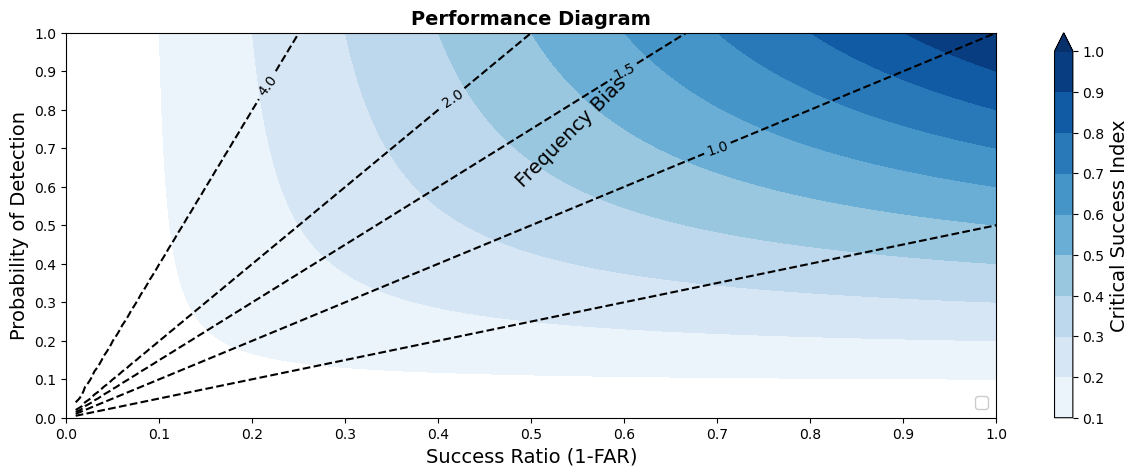

In [42]:
plt.figure(figsize=(15,5))
plt.style.use("default")
csi_cmap = "Blues"
csi_label="Critical Success Index"
title="Performance Diagram"
xlabel="Success Ratio (1-FAR)"
ylabel="Probability of Detection"
legend_params=dict(loc=4, fontsize=12, framealpha=1, frameon=True)
ticks=np.arange(0, 1.1, 0.1)
grid_ticks = np.arange(0, 1.01, 0.01)
sr_g, pod_g = np.meshgrid(grid_ticks, grid_ticks)
bias = pod_g / sr_g
csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)
csi_contour = plt.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap=csi_cmap)
b_contour = plt.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed")
plt.clabel(b_contour, fmt="%1.1f", manual=[(0.2, 0.9), (0.4, 0.9), (0.6, 0.9), (0.7, 0.7)])
   
FAR = 0.2
POD = 0.7
filename = "performance_diagram.png"
dpi=300
plt.plot(1 - FAR, POD)
cbar = plt.colorbar(csi_contour)
cbar.set_label(csi_label, fontsize=14)
plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.xticks(ticks)
plt.yticks(ticks)
plt.title(title, fontsize=14, fontweight="bold")
plt.text(0.48,0.6,"Frequency Bias",fontdict=dict(fontsize=14, rotation=45))
plt.legend(**legend_params)
plt.savefig(filename, dpi=dpi, bbox_inches="tight")
plt.show()